# Projeto Pima Indians Diabetes Database

> O notebook está formatado com o uso da metodologia CRISP-DM.

O objetivo desse notebook é, dado as informações de um paciente, determinar a probabilidade do paciente desenvolver diabetes.

## Step 0 

### Discussão sobre o problema

- O que está sendo solicitado e para quem é o problema?
- Qual a motivação?
- Qual a causa raiz do problema?
- Qual o formato da solução?

### Quais são as informações sobre os dados?

- Como os dados foram coletados?
- Como os dados foram modificados?

### Step 0.1: Importing libs and helpter functions

In [53]:
# Importing libs

import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
config = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
}

sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_style("ticks", config)




# Divisão da base de dados
from sklearn.model_selection import train_test_split
 
# API para modelo de Regressão Logística
import statsmodels.api as sm
 
# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score)


### Step 0.2: Loading data

In [2]:
data_raw = pd.read_csv('data\diabetes.csv')

## Step 1 - Entendendo os dados

In [11]:
df = data_raw.copy()
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Verificar valores nulos

In [15]:
df.isnull().mean()

Pregnancies                0.00
Glucose                    0.00
BloodPressure              0.00
SkinThickness              0.00
Insulin                    0.00
BMI                        0.00
DiabetesPedigreeFunction   0.00
Age                        0.00
Outcome                    0.00
dtype: float64

### Estatística descritiva

In [29]:
# Separando os atributos entre numéricos e categóricos
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(exclude=['int64', 'float64'])


#### Numerical features

In [30]:
numerical_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,763.00,121.69,30.54,44.00,99.00,117.00,141.00,199.00
BloodPressure,733.00,72.41,12.38,24.00,64.00,72.00,80.00,122.00
SkinThickness,541.00,29.15,10.48,7.00,22.00,29.00,36.00,99.00
Insulin,394.00,155.55,118.78,14.00,76.25,125.00,190.00,846.00
BMI,757.00,32.46,6.92,18.20,27.50,32.30,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


#### Categorical features

In [20]:
pd.DataFrame([{
        "Feature": name, 
         "Distinct category count": categorical_attributes[name].unique().shape[0]
        } for name in categorical_attributes])

#TODO: Listar itens únicos por categoria

""


In [21]:
# Listar categorias

for category_name in categorical_attributes:
    display(pd.DataFrame(categorical_attributes[category_name].unique(), columns = [category_name]))

## Análise estatística

### Análise de dados Univariada

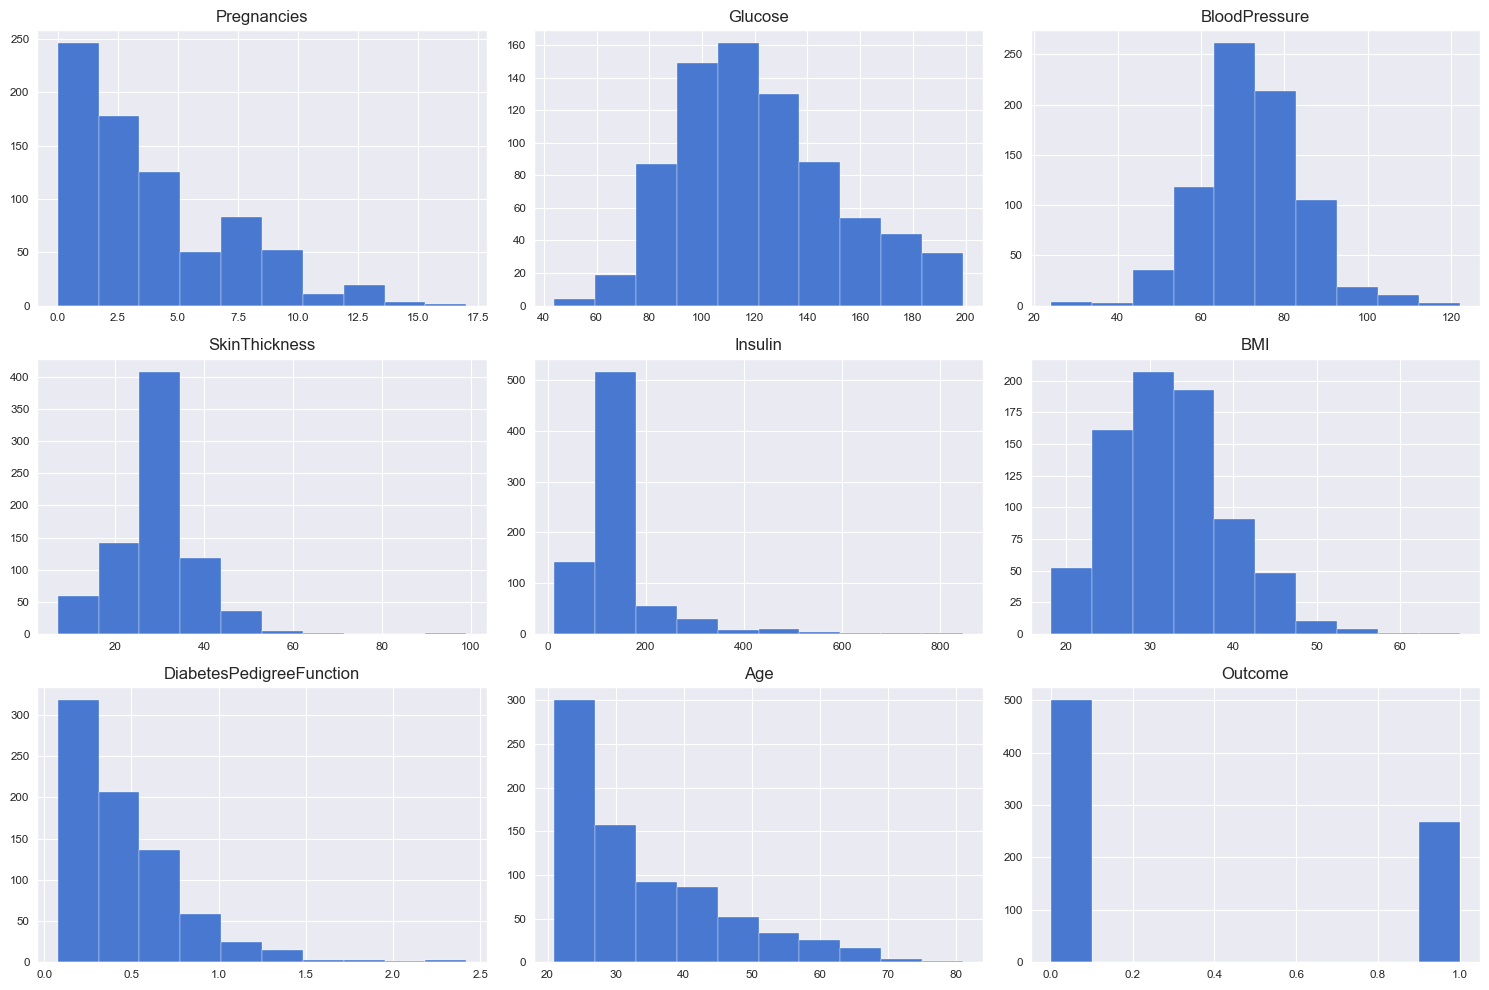

In [34]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
df.hist(figsize=(15, 10))
plt.show()

In [ ]:
# Colunas para converter 0 em NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Substitui 0 em NaN
df[cols] = df[cols].replace(0, np.nan)

In [32]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:

# Imputando os valores nulos com a média
df[cols] = df[cols].fillna(df[cols].mean())

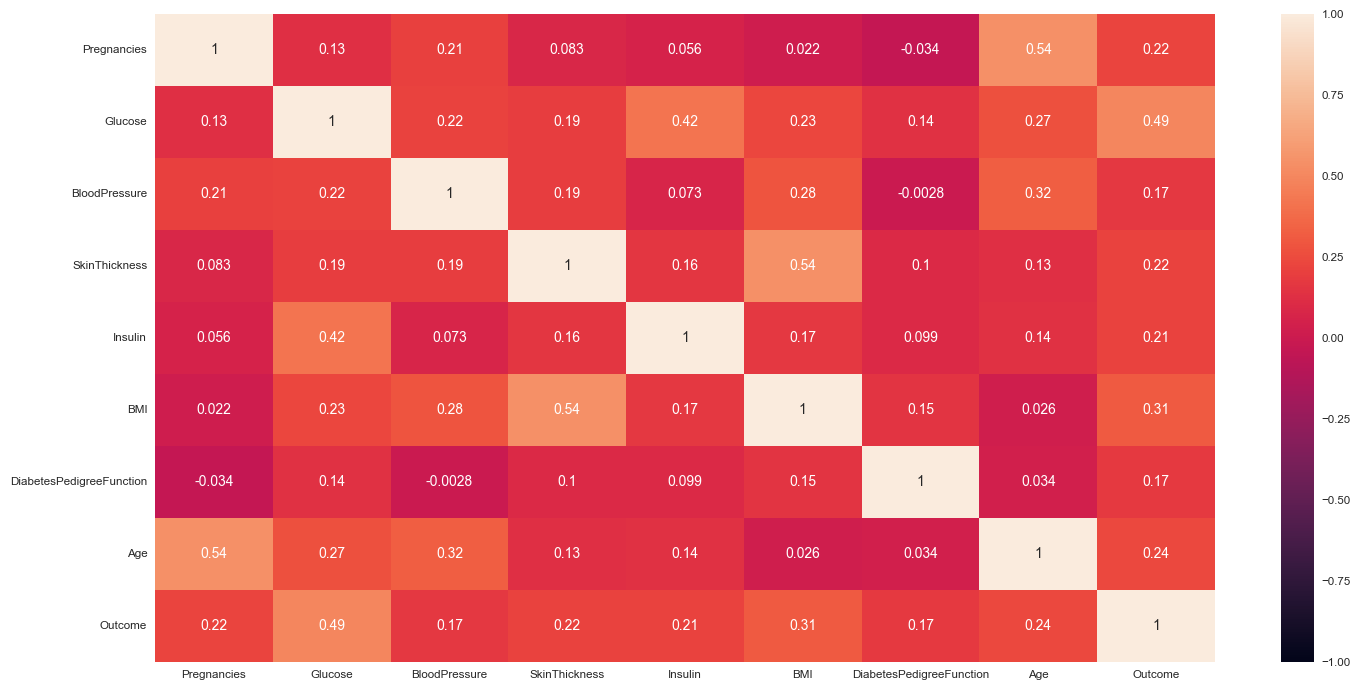

In [36]:

# Mapa de Calor para Correlação
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()


In [43]:
# Contagem dos valores em cada classe
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [42]:
# Porcentagem dos valores em cada classe
df['Outcome'].value_counts(normalize=True)


Outcome
0   0.65
1   0.35
Name: proportion, dtype: float64

In [44]:
# Variáveis independentes (características)
X = df.drop(['Outcome'], axis=1) # features of interest

# Variável dependente (alvo)
y = df['Outcome'] # feature target

# Adiciona a constante
X = sm.add_constant(X)

In [50]:
# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=1,
                                                    stratify=y)  # mantém as proporções das classes

y_train.value_counts(normalize=True)


Outcome
0   0.65
1   0.35
Name: proportion, dtype: float64